In [1]:
# tools
import numpy as np
import numpy.random as rand
import scipy as sp
from sklearn.datasets.samples_generator import make_blobs

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Parameters

In [2]:
# number of groups
m = 2

# number of samples for each group (dim = m)
num_samples_tot = 100
num_samples = np.r_[70, 30]

# number of cells for each sample
n = 1000

# number of cell types for each sample
# for example: T cell and Bnum_samples_tot cell
k = 2

# proportion of cell types (dim = k) 
# each vector sum to one
pi_1 = [0.9, 0.1]
pi_2 = [0.1, 0.9]
pi = np.stack([pi_1, pi_2])

# number of genes / markers / features (dim = p)
# for example: CD3, CD8, IL-1-R
p = 3 

# mean value for gene expression measured by an experiment
mu_11 = np.r_[ 0,  0,  0] # first  cell type of group 1
mu_12 = np.r_[10, 10, 10] # second cell type of group 1
mu_21 = np.r_[ 0,  0,  0] # first  cell type of group 2
mu_22 = np.r_[10, 10, 10] # second cell type of group 2
mu = np.stack((mu_11, mu_12, mu_21, mu_22), axis = 0)
mu = np.expand_dims(mu, axis = 0)
mu = mu.reshape(m, k, p)

# var-cov of mu (mean value of gene expression) 
# --- covariance of sample mean (statistics)
sig2_mu_11 = np.eye(p)
sig2_mu_12 = np.eye(p)
sig2_mu_21 = np.eye(p)
sig2_mu_22 = np.eye(p)
sig2_mu = np.stack((sig2_mu_11, sig2_mu_12, sig2_mu_21, sig2_mu_22), axis = 0)
sig2_mu = np.expand_dims(sig2_mu, axis = 0)
sig2_mu = np.expand_dims(sig2_mu, axis = 0)
sig2_mu = sig2_mu.reshape(m, k, p, p)

# var-cov of sample (gene expression) 
# --- covariance of sample value (random variables)
sig2_11 = np.eye(p)
sig2_12 = np.eye(p)
sig2_21 = np.eye(p)
sig2_22 = np.eye(p)
sig2 = np.stack((sig2_11, sig2_12, sig2_21, sig2_22), axis = 0)
sig2 = np.expand_dims(sig2, axis = 0)
sig2 = np.expand_dims(sig2, axis = 0)
sig2 = sig2.reshape(m, k, p, p)

In [3]:
pi

array([[0.9, 0.1],
       [0.1, 0.9]])

In [4]:
# mu[group_i][celltype_j]
mu

array([[[ 0,  0,  0],
        [10, 10, 10]],

       [[ 0,  0,  0],
        [10, 10, 10]]])

In [5]:
# sig2_mu[group_i][celltype_j]
sig2_mu

array([[[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]],


       [[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]]])

In [6]:
# sig2[group_i][celltype_j]
sig2

array([[[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]],


       [[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]]])

# create number of each cell types based on $\pi_i$ for each sample in each group

In [7]:
num_cells = np.vstack([rand.multinomial(n, pvals = pi[idx], size = num_samples[idx]) for idx in range(m)])
for idx in range(num_cells.shape[0]):
    if(idx == num_samples[0]):
        print("----------")
    print("%2d" % idx, num_cells[idx])
    

 0 [903  97]
 1 [902  98]
 2 [907  93]
 3 [906  94]
 4 [915  85]
 5 [920  80]
 6 [909  91]
 7 [893 107]
 8 [895 105]
 9 [892 108]
10 [887 113]
11 [900 100]
12 [896 104]
13 [891 109]
14 [890 110]
15 [899 101]
16 [898 102]
17 [890 110]
18 [907  93]
19 [903  97]
20 [907  93]
21 [896 104]
22 [896 104]
23 [898 102]
24 [893 107]
25 [899 101]
26 [895 105]
27 [897 103]
28 [902  98]
29 [888 112]
30 [905  95]
31 [912  88]
32 [899 101]
33 [897 103]
34 [898 102]
35 [909  91]
36 [912  88]
37 [897 103]
38 [899 101]
39 [912  88]
40 [902  98]
41 [900 100]
42 [885 115]
43 [888 112]
44 [906  94]
45 [895 105]
46 [894 106]
47 [908  92]
48 [907  93]
49 [880 120]
50 [888 112]
51 [891 109]
52 [897 103]
53 [891 109]
54 [895 105]
55 [911  89]
56 [905  95]
57 [903  97]
58 [906  94]
59 [909  91]
60 [907  93]
61 [877 123]
62 [905  95]
63 [904  96]
64 [903  97]
65 [896 104]
66 [904  96]
67 [896 104]
68 [895 105]
69 [896 104]
----------
70 [109 891]
71 [ 88 912]
72 [ 70 930]
73 [108 892]
74 [102 898]
75 [101 899]
7

# create mean value of gene expression for each cell type in each sample

In [8]:
# ex: the mean values of gene expression for first cell type in first group of sample
print(mu[0][0])
print("-------")
# ex: sig2_mu -> the variance covariance matrix of sample mean
print(sig2_mu[0][0])

[0 0 0]
-------
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [9]:
mean_val = [
    rand.multivariate_normal(
        mu[idx_group][idx_celltype], 
        sig2_mu[idx_group][idx_celltype], 
        num_samples[idx_group])         
    for idx_group in range(m) 
    for idx_celltype in range(k)]

mean_val = np.array(mean_val)
mean_val = np.expand_dims(mean_val, axis = 0)
mean_val = mean_val.reshape(m, k)
mean_val.shape

(2, 2)

In [10]:
# first cell type in group 1
print(mu[0][0])
print(mean_val[0][0].shape)
print(mean_val[0][0][0:6])

[0 0 0]
(70, 3)
[[-1.09833804  1.94710322  0.05721732]
 [-0.01865685  0.19714297  0.37515936]
 [ 0.35438894 -1.12424442 -0.62685562]
 [ 0.01689629 -0.23172743 -0.41636791]
 [-0.39075058 -1.09913898  0.59489729]
 [ 0.19839033  1.26885362  1.82386291]]


In [11]:
# second cell type in group 1
print(mu[0][1])
print(mean_val[0][1].shape)
print(mean_val[0][1][0:6])

[10 10 10]
(70, 3)
[[ 9.0981175   9.25051281 10.36495964]
 [ 9.80007287  8.03593129 10.69973518]
 [ 9.67085983  9.39057024  9.94627038]
 [ 9.67566039  8.73426567 11.08339598]
 [11.45673606  8.80682176  8.99892923]
 [10.63252414 10.25012213 10.89302304]]


convert the shape of the mean values

In [12]:
tmp = mean_val
tmp = [np.stack(tmp[idx_group], axis = 2) for idx_group in range(m)]
tmp = [np.swapaxes(tmp[idx_group], 1, 2) for idx_group in range(m)]
#tmp = [tmp[idx_group].reshape(-1, k, p) for idx_group in range(m)] this does not work properly
#https://stackoverflow.com/questions/42312670/how-does-numpy-swapaxes-work

tmp = np.array(tmp)
mean_val2 = np.vstack(tmp)

In [13]:
print("Group 01")
print(tmp[0].shape)
print(tmp[0][0])
print("------------")
print("Group 02")
print(tmp[1].shape)
print(tmp[1][0])
print("------------")
print("Combine -> array[idx_group][idx_celltype][idx_gene]")
print(mean_val2.shape)
print(mean_val2[0])

Group 01
(70, 2, 3)
[[-1.09833804  1.94710322  0.05721732]
 [ 9.0981175   9.25051281 10.36495964]]
------------
Group 02
(30, 2, 3)
[[-1.16389349 -0.62554539 -1.15994256]
 [ 9.37654891 11.04755951 10.1420391 ]]
------------
Combine -> array[idx_group][idx_celltype][idx_gene]
(100, 2, 3)
[[-1.09833804  1.94710322  0.05721732]
 [ 9.0981175   9.25051281 10.36495964]]


# create data for each sample

what are the inputs? -> mean_val2, sig2, num_cells

In [14]:
# mean_val2[idx_sample][idx_celltype]
mean_val2[0]

array([[-1.09833804,  1.94710322,  0.05721732],
       [ 9.0981175 ,  9.25051281, 10.36495964]])

In [15]:
# Recall that:
#     num_cells store the proportion values of each cell type
#     num_cells is generated from the latent variable pi
#     the dimension of num_cells = (num_samples_tot, k = number of celltypes)
#     sum of each row = n = number of cels
print(num_cells.shape)
print(n)
print(num_cells[0])

(100, 2)
1000
[903  97]


In [16]:
# Recall
#     sig2 is the sample covariance
#     sig2[idx_group][idx_celltype][p][p]
print(sig2.shape)

(2, 2, 3, 3)


it turns out that the n_samples of make_blobs cannot be given as a vector

```
# create data
data, labels = make_blobs(
    n_samples = points_per_feature * n_features, # number of total samples
    n_features = n_features,                     # number of features (ex: X and Y --- 2)
    centers = centers,                           # centers --- length of centers matchs the n_features
    cluster_std=0.3,                             # variation
    random_state=5                               # set seed
)
```

In [17]:
n_features = 2               # number of features (ex; X and Y --- 2)
points_per_feature = 5       # for each category, generate how much data points
centers = [(2, 2), (10, 10)] # specify the centers of each category

# create data
data, labels = make_blobs(
    n_samples  = 10,         # number of total samples
    n_features = 2,          # number of features (ex: X and Y --- 2)
    centers    = centers,    # centers --- length of centers matchs the n_features
    cluster_std=np.eye(2),   # variation
    shuffle = False, 
    random_state=5           # set seed
)
data

array([[ 2.44122749,  2.        ],
       [ 4.43077119,  2.        ],
       [ 2.10960984,  2.        ],
       [ 1.0907676 ,  2.        ],
       [ 2.18760323,  2.        ],
       [10.        ,  9.79512349],
       [10.        , 10.6034716 ],
       [10.        ,  9.29982096],
       [10.        , 11.85733101],
       [10.        , 10.64484751]])

In [18]:
n_features = 2               # number of features (ex; X and Y --- 2)
points_per_feature = 5       # for each category, generate how much data points
centers = [(2, 2), (10, 10)] # specify the centers of each category

# create data
data, labels = make_blobs(
    n_samples  = [7, 3],         # number of total samples
    n_features = 2,          # number of features (ex: X and Y --- 2)
    centers    = centers,    # centers --- length of centers matchs the n_features
    cluster_std=np.eye(2),   # variation
    shuffle = False, 
    random_state=5           # set seed
)
data

TypeError: unsupported operand type(s) for //: 'list' and 'int'

Therefore, I used **multivariate_normal** function in numpy.random instead

In [40]:
label_group = [0] * num_samples[0] + [1] * num_samples[1]
label_group 
print(label_group)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [22]:
# initialize a container for all samples
samples = list()

# append array in loop
# note: http://akuederle.com/create-numpy-array-with-for-loop
for idx_sample in range(num_cells.shape[0]): # each sample can be viewed as a fcs file
    a_sample = np.empty((0, 3))
    idx_group = label_group[idx_sample]
    
    for idx_celltype in range(num_cells.shape[1]): # each sample contains different cell types
        
        a_celltype = rand.multivariate_normal(
            mean_val2[idx_sample][idx_celltype], # mean
            sig2[idx_group][idx_celltype],      # var-cov
            num_cells[idx_sample][idx_celltype]) # number
        
        a_sample = np.r_[a_sample, a_celltype]
        
    samples.append(a_sample)

# convert output in an array
samples = np.array(samples)

In [23]:
# check the dimensions
print(len(samples))
print(samples[0].shape)

100
(1000, 3)


In [24]:
tmp = np.array(samples)
tmp.shape

(100, 1000, 3)

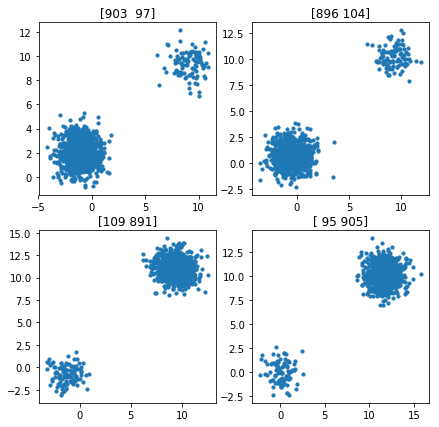

In [25]:
#plt.figure(figsize=(3,3))
#sub = plt.subplot(2, 2, 1)
#plt.scatter(data[:, 0], data[:, 1], s=10, alpha=1) # alpha=0.3
#plt.show()

fig, axes = plt.subplots(2, 2, figsize=(7,7))
for idx_data, ax in zip([0, -31, -30, -1], axes.ravel()):
    data = samples[idx_data]
    ax.scatter(data[:, 0], data[:, 1], s=10, alpha=1)
    ax.title.set_text(str(num_cells[idx_data]))
plt.show()

# output the value

In [30]:
import pickle
# Note: https://pythontips.com/2013/08/02/what-is-pickle-in-python/

In [41]:
# output the parameters
np.savetxt("num_cells.csv", num_cells, delimiter=",")
np.savetxt("label_group.csv", , delimiter=",")

In [37]:
# output the parameters
file_name = "mean_val"

# open the file for writing
file_object = open(file_name, 'wb') 

# write data to the file
pickle.dump(mean_val2, file_object)   

# here we close the fileObject
file_object.close()

In [34]:
# output the value
file_Name = "data_simulation"

# open the file for writing
fileObject = open(file_Name, 'wb') 

# write data to the file
pickle.dump(samples, fileObject)   

# here we close the fileObject
fileObject.close()

In [32]:
ls

01 Data Simulation.ipynb                 data_simulation
02 tSNE and Gaussian Kernel Image.ipynb  README.md
